# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel

# Question 1

**Explain how you solve the model**

In [ ]:
# code for solving the model (remember documentation and comments)

a = np.array([1,2,3])
#b = inauguralproject.square(a)
#print(b)

model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()



HM = np.zeros([3,3])

alphalist = [0.25, 0.50, 0.75]
sigmalist = [0.5, 1.0, 1.5]

for i, j in enumerate(alphalist):
    model.par.alpha = j
    for it, s in enumerate(sigmalist):
        model.par.sigma = s
        out =  model.solve_discrete()
        HM[i,it] = out.HF /out.HM



In [92]:
#Resets parameters
model.alpha = 0.5
model.sigma=1

# Question 2

In [2]:
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()
model.solve_wF_vec(discrete=True)

/Users/emmagabriel/Documents/KU/6. Semester/Introduction to Programming and Numerical Analysis/projects-2023-hold-11/inauguralproject/HouseholdSpecializationModel.py:73: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


In [3]:
y = np.log(model.sol.HF_vec/model.sol.HM_vec)
y

array([ 0.22314355,  0.        ,  0.        , -0.11778304, -0.22314355])

In [8]:
LM_vec = model.sol.LM_vec


In [9]:
HM_vec = model.sol.HM_vec

In [10]:
HF_vec = model.sol.HF_vec

In [11]:
LF_vec = model.sol.LF_vec

In [12]:
par = model.par

In [13]:
import matplotlib.pyplot as plt
H_log = np.log(y)
w_log = np.log(model.par.wF_vec)

fig = plt.Figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(H_log, w_log, ls='--', lw=2, color='magenta')
plt.show()

/var/folders/ft/f467_j493855psj5121nl9kc0000gn/T/ipykernel_20557/1915531667.py:2: RuntimeWarning: divide by zero encountered in log
  H_log = np.log(y)
/var/folders/ft/f467_j493855psj5121nl9kc0000gn/T/ipykernel_20557/1915531667.py:2: RuntimeWarning: invalid value encountered in log
  H_log = np.log(y)


/var/folders/ft/f467_j493855psj5121nl9kc0000gn/T/ipykernel_20557/3875554793.py:1: RuntimeWarning: divide by zero encountered in log
  H_log = np.log(y)
/var/folders/ft/f467_j493855psj5121nl9kc0000gn/T/ipykernel_20557/3875554793.py:1: RuntimeWarning: invalid value encountered in log
  H_log = np.log(y)


<function matplotlib.pyplot.show(close=None, block=None)>

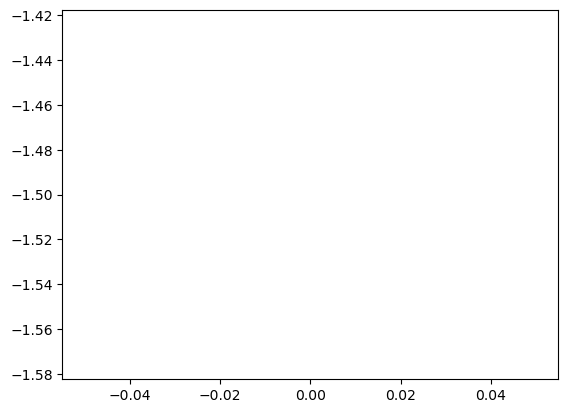

In [7]:
H_log = np.log(y)
w_log = np.log(par.wF_vec)

import matplotlib.pyplot as plt
plt.plot(H_log)
plt.show


Explain your code and procedure

# Question 3

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.

In [ ]:
#Question 4
